In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
sns.set_style("whitegrid")
sns.set_palette("RdBu")

In [4]:
df = pd.read_csv('AAPL.csv')
print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2019-05-16  189.910004  192.470001  188.839996  190.080002  190.080002   
1  2019-05-17  186.929993  190.899994  186.759995  189.000000  189.000000   
2  2019-05-20  183.520004  184.350006  180.279999  183.089996  183.089996   
3  2019-05-21  185.220001  188.000000  184.699997  186.600006  186.600006   
4  2019-05-22  184.660004  185.710007  182.550003  182.779999  182.779999   

     Volume  
0  33031400  
1  32879100  
2  38612300  
3  28364800  
4  29748600  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       21 non-null     object 
 1   Open       21 non-null     float64
 2   High       21 non-null     float64
 3   Low        21 non-null     float64
 4   Close      21 non-null     float64
 5   Adj Close  21 non-null     float64
 6   Volume     21 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.3+ KB


In [6]:
df.shape

(21, 7)

In [9]:
missing_values=df.isna().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

In [11]:
df.fillna(df.mean(), inplace=True)

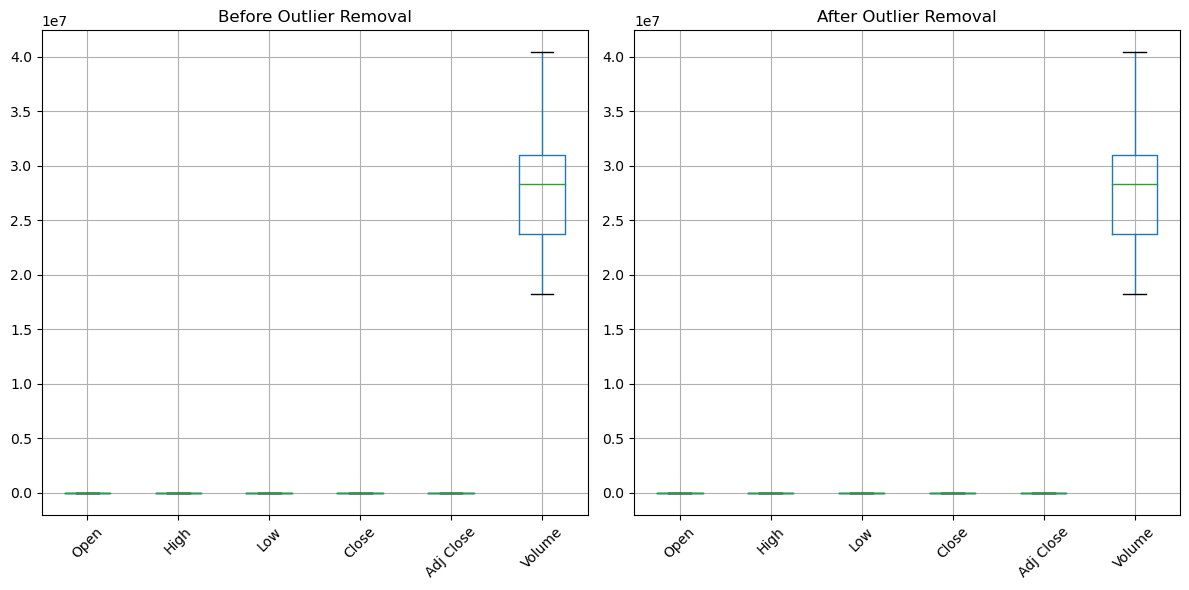

Number of data points before outlier removal: 21
Number of data points after outlier removal: 21


In [5]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df[numeric_columns].boxplot()
plt.title('Before Outlier Removal')
plt.xticks(rotation=45)

# Outlier detection and removal
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[~((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)]

# After outlier removal
plt.subplot(1, 2, 2)
df_cleaned[numeric_columns].boxplot()
plt.title('After Outlier Removal')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print number of data points before and after outlier removal
print("Number of data points before outlier removal:", len(df))
print("Number of data points after outlier removal:", len(df_cleaned))

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,21.000000,21.000000,21.000000,21.000000,21.000000,2.100000e+01
mean,184.359047,186.624762,182.928095,184.689524,184.689524,2.827415e+07
std,6.541282,6.684339,7.035509,6.867342,6.867342,6.038106e+06
min,175.440002,177.919998,170.270004,173.300003,173.300003,1.825320e+07
25%,178.919998,180.539993,177.809998,178.970001,178.970001,2.371470e+07
50%,184.279999,185.470001,182.149994,183.089996,183.089996,2.836480e+07
75%,189.910004,192.470001,188.839996,190.149994,190.149994,3.096800e+07
max,194.860001,196.789993,193.600006,194.809998,194.809998,4.039610e+07


In [ ]:
#Visual Analysis

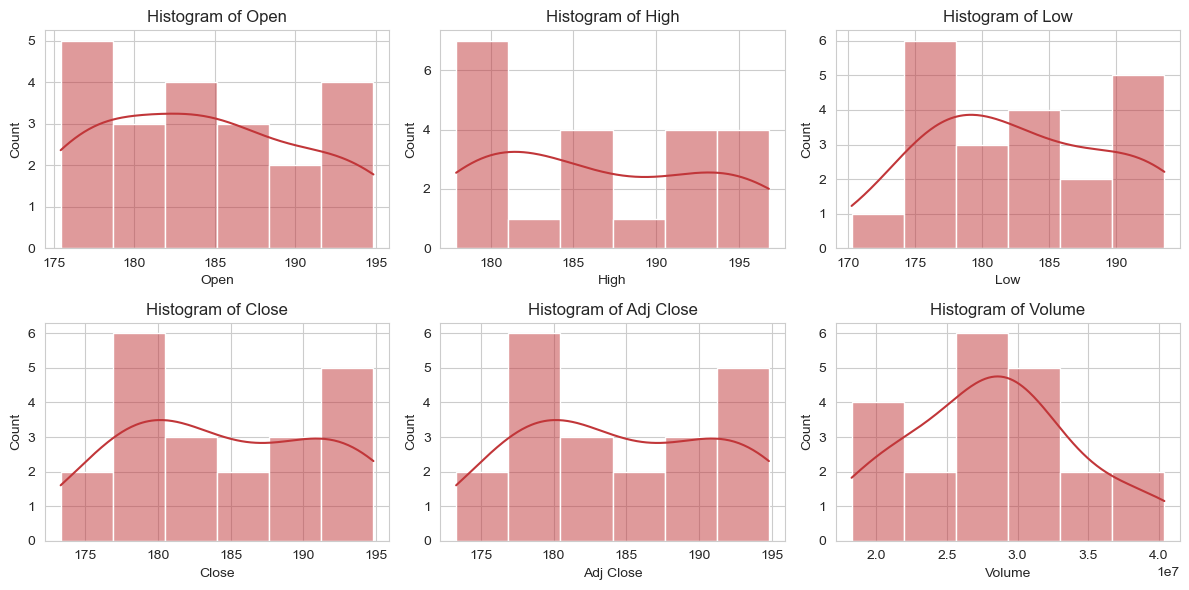

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for numeric features
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


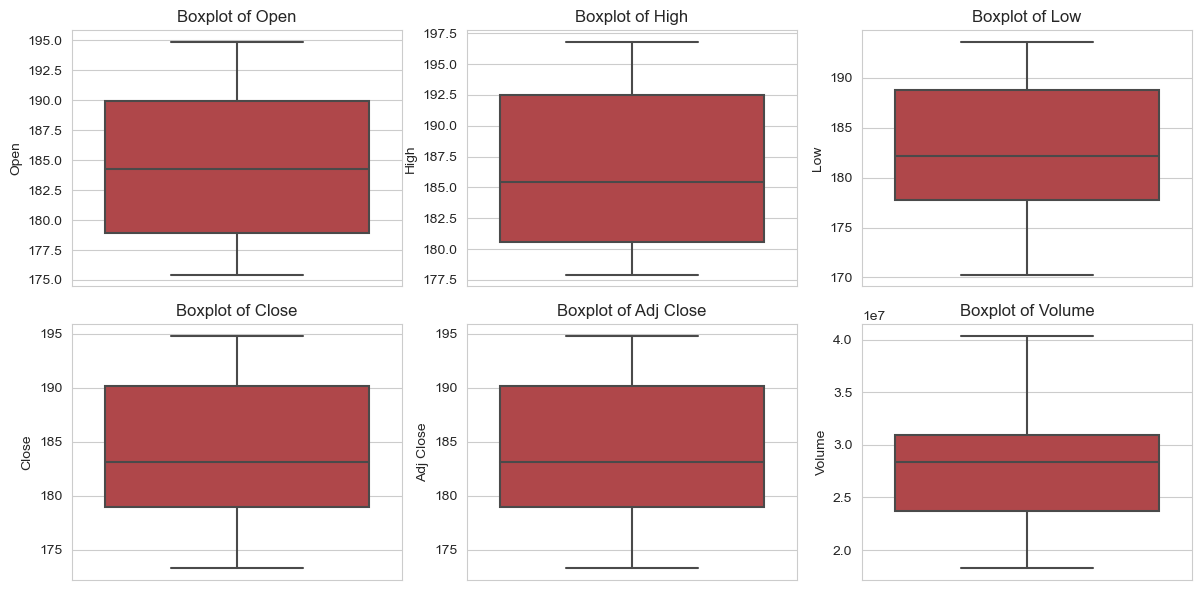

In [14]:
# Plot boxplots for numeric features
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


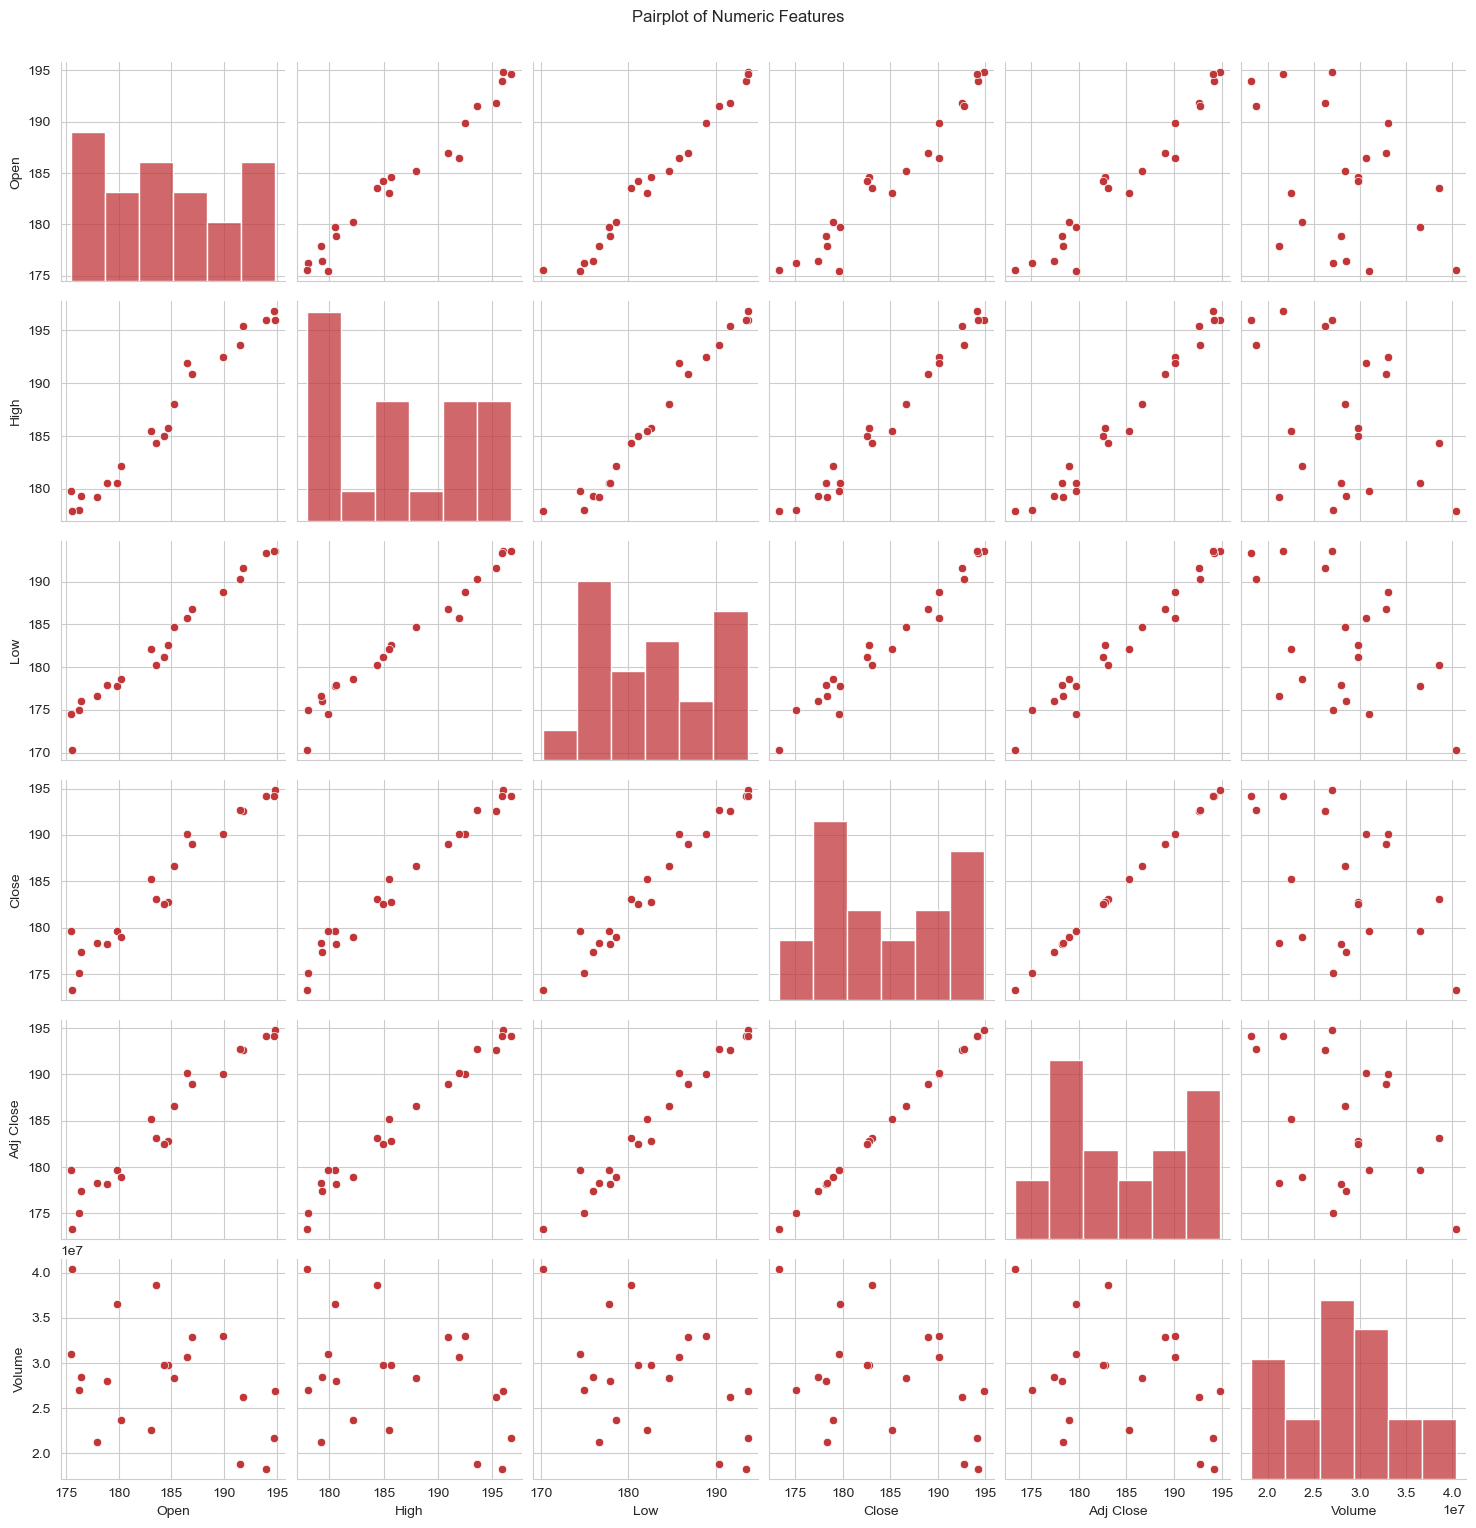

In [16]:
# Plot pairplot for numeric features
sns.pairplot(df)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

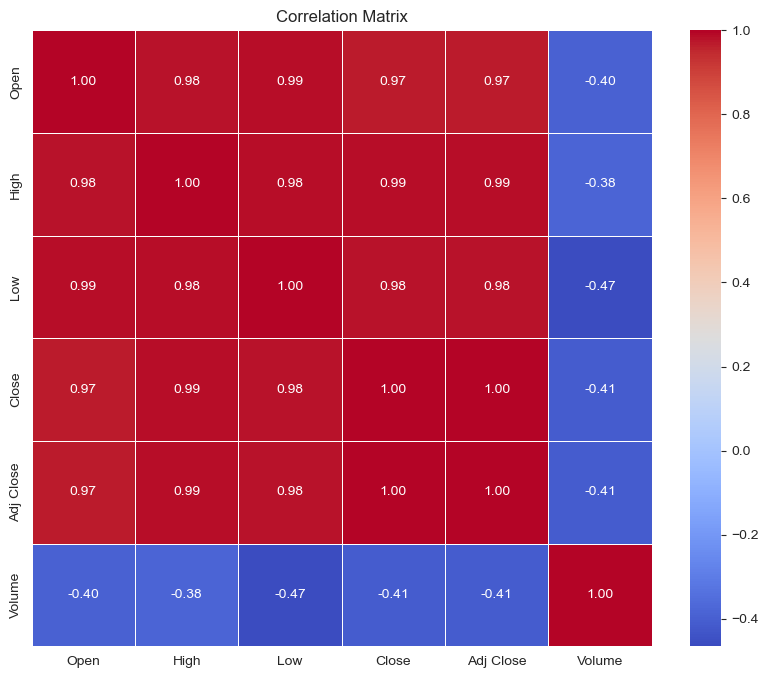

In [17]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_2276\1884476348.py:32: RuntimeWarning: divide by zero encountered in scalar divide
  lr_accuracy = 1 / lr_mse  # Calculating accuracy using inverse of MSE


Linear Regression Accuracy: inf
Ridge Regression Accuracy: 5.998574540136571
KNN Regression Accuracy: 0.11525514715478681


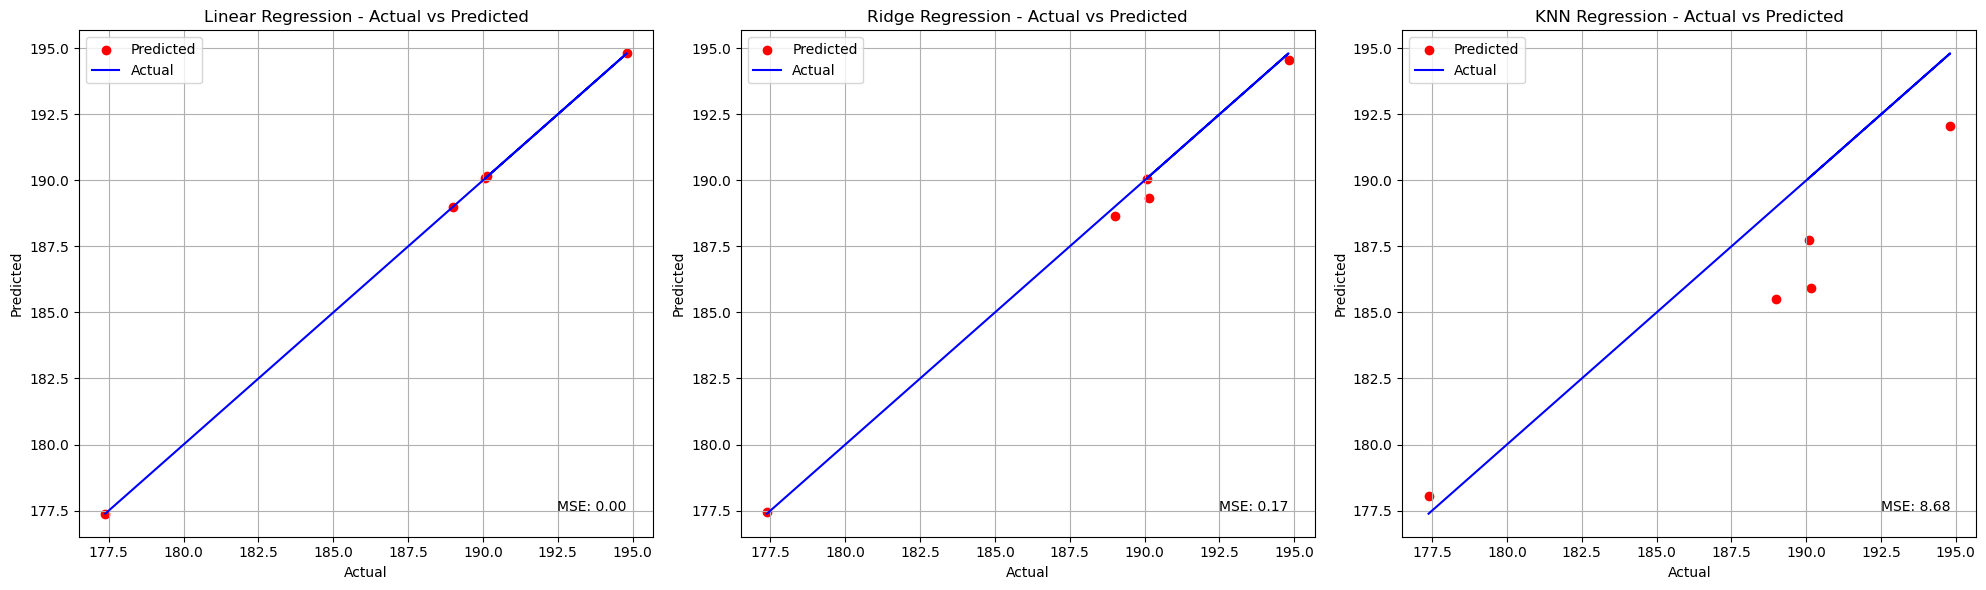

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('AAPL.csv')

# Select features and target
X = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = df['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store accuracy of each model
accuracy_dict = {}

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_accuracy = 1 / lr_mse  # Calculating accuracy using inverse of MSE
accuracy_dict['Linear Regression'] = lr_accuracy

# Ridge Regression
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_accuracy = 1 / ridge_mse
accuracy_dict['Ridge Regression'] = ridge_accuracy

# KNN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_accuracy = 1 / knn_mse
accuracy_dict['KNN Regression'] = knn_accuracy

# Print accuracy of each model
for model, accuracy in accuracy_dict.items():
    print(f"{model} Accuracy: {accuracy}")

# Plotting
plt.figure(figsize=(20, 6))

# Plotting actual vs predicted for each model
for i, (model, predictions) in enumerate({
        'Linear Regression': lr_predictions,
        'Ridge Regression': ridge_predictions,
        'KNN Regression': knn_predictions
    }.items(), start=1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, predictions, color='red', label='Predicted')
    plt.plot(y_test, y_test, color='blue', label='Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model} - Actual vs Predicted')
    mse_text = f'MSE: {mean_squared_error(y_test, predictions):.2f}'
    plt.text(y_test.max(), y_test.min(), mse_text, verticalalignment='bottom', horizontalalignment='right')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [21]:
# Calculate R2 score for each model
lr_r2 = r2_score(y_test, lr_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

# Calculate MAE for each model
lr_mae = mean_absolute_error(y_test, lr_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
knn_mae = mean_absolute_error(y_test, knn_predictions)

# Print accuracy of each model using R2 score and MAE
for model, r2, mae in zip(models, [lr_r2, ridge_r2, knn_r2], [lr_mae, ridge_mae, knn_mae]):
    print(f"{model} Accuracy (R2 Score): {r2:.2f}")
    print(f"{model} Accuracy (MAE): {mae:.2f}")
    print()


Linear Regression Accuracy (R2 Score): 1.00
Linear Regression Accuracy (MAE): 0.00

Ridge Regression Accuracy (R2 Score): 1.00
Ridge Regression Accuracy (MAE): 0.30

KNN Regression Accuracy (R2 Score): 0.74
KNN Regression Accuracy (MAE): 2.69



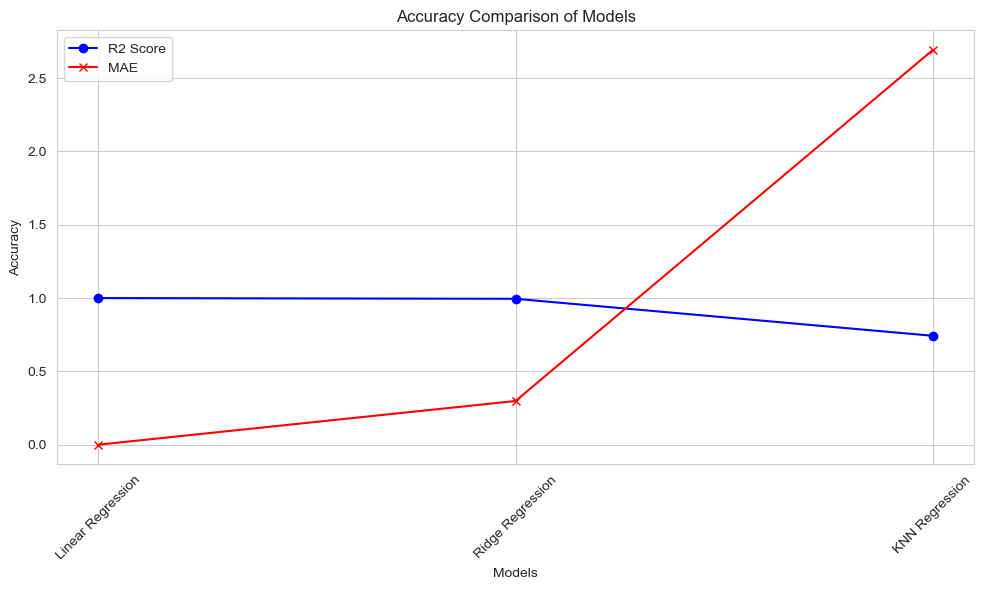

In [22]:
# Create lists to hold model names, R2 scores, and MAE
models = ['Linear Regression', 'Ridge Regression', 'KNN Regression']
r2_scores = [lr_r2, ridge_r2, knn_r2]
mae_scores = [lr_mae, ridge_mae, knn_mae]

# Plotting
plt.figure(figsize=(10, 6))

# Plot R2 scores
plt.plot(models, r2_scores, marker='o', label='R2 Score', color='blue')

# Plot MAE scores
plt.plot(models, mae_scores, marker='x', label='MAE', color='red')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.legend()

# Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
